In [1]:
%%capture
!pip install super-gradients

In [2]:
pip install torch torchvision opencv-python pandas tqdm

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os

In [4]:
import wandb

# Disable WandB
os.environ["WANDB_DISABLED"] = "true"

In [5]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 19.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
from ultralytics import NAS, YOLO
 
# Load a COCO-pretrained YOLO-NAS-s model
# model = NAS("yolo_nas_l.pt")

# Load a YOLOv8 model
model = YOLO('yolov8l.pt')  # You can change to 'yolov8x.pt' for extra large, or 'yolov8n.pt' for nano version

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 83.7M/83.7M [00:00<00:00, 385MB/s]


In [7]:
# Train the model
model.train(
    data='/kaggle/input/traffic-detection-project/data.yaml',  # Path to the .yaml file describing the dataset
    epochs=10,  # Train for up to 300 epochs (You can set it based on the available time)
    batch=16,  # Adjust batch size according to your GPU memory
    imgsz=640,  # Image size (you can increase it for higher accuracy but more memory usage)
    workers=2,  # Number of workers for data loading
    device=0,  # Specify GPU (use device=0 for a single GPU, or device=[0,1] for multiple GPUs)
    patience=50,  # Early stopping if validation performance does not improve
    save_period=10,  # Save model every 10 epochs
    save=True,  # Save checkpoint after training
    project='traffic_detection',  # Save results in 'traffic_detection' folder
    name='yolov8_best',  # Name of the experiment
    verbose=True  # Print training progress
)

Ultralytics 8.3.19 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/kaggle/input/traffic-detection-project/data.yaml, epochs=10, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=10, cache=False, device=0, workers=2, project=traffic_detection, name=yolov8_best, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, 

100%|██████████| 755k/755k [00:00<00:00, 17.5MB/s]
2024-10-22 08:29:19,645	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-10-22 08:29:20,984	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Tracking run with wandb version 0.18.3
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 93.8MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/traffic-detection-project/train/labels... 5805 images, 93 backgrounds, 0 corrupt: 100%|██████████| 5805/5805 [00:27<00:00, 207.71it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/traffic-detection-project/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/traffic-detection-project/valid/labels... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:02<00:00, 216.65it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/traffic-detection-project/valid is not writeable, cache not saved.


Plotting labels to traffic_detection/yolov8_best/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to traffic_detection/yolov8_best
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      10.8G      1.266      1.083      1.146        161        640: 100%|██████████| 363/363 [05:40<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.43it/s]


                   all        549       6270      0.657      0.636      0.663      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      10.9G      1.231     0.8428      1.139        168        640: 100%|██████████| 363/363 [05:35<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.57it/s]


                   all        549       6270      0.718      0.665      0.729      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      10.9G      1.194     0.7768      1.123        125        640: 100%|██████████| 363/363 [05:34<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.57it/s]


                   all        549       6270      0.801      0.717      0.783      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      10.9G      1.142     0.7093      1.088        176        640: 100%|██████████| 363/363 [05:33<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.57it/s]


                   all        549       6270      0.777      0.772      0.833      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      10.9G      1.094     0.6508      1.065        120        640: 100%|██████████| 363/363 [05:33<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.58it/s]


                   all        549       6270      0.819      0.805       0.86      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      10.7G      1.049      0.601       1.04        149        640: 100%|██████████| 363/363 [05:33<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.58it/s]

                   all        549       6270      0.867      0.815      0.882      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      10.9G      1.001     0.5582      1.017        195        640: 100%|██████████| 363/363 [05:33<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.58it/s]

                   all        549       6270      0.842      0.844      0.892      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      10.9G     0.9562     0.5208     0.9938        166        640: 100%|██████████| 363/363 [05:33<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.58it/s]

                   all        549       6270      0.887      0.841      0.905      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      10.9G     0.9107     0.4852     0.9758        118        640: 100%|██████████| 363/363 [05:33<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.58it/s]

                   all        549       6270      0.886       0.86      0.917      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      10.7G      0.863     0.4505     0.9571        123        640: 100%|██████████| 363/363 [05:33<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.58it/s]

                   all        549       6270      0.893      0.869      0.927      0.703



10 epochs completed in 0.969 hours.
Optimizer stripped from traffic_detection/yolov8_best/weights/last.pt, 87.7MB
Optimizer stripped from traffic_detection/yolov8_best/weights/best.pt, 87.7MB

Validating traffic_detection/yolov8_best/weights/best.pt...
Ultralytics 8.3.19 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 268 layers, 43,610,463 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:13<00:00,  1.34it/s]


                   all        549       6270      0.894      0.869      0.927      0.703
               bicycle        189        250      0.916       0.92      0.944      0.753
                   bus         81        108      0.876      0.915      0.948      0.835
                   car        520       3842      0.897      0.947      0.965      0.767
             motorbike        331       1238      0.929       0.79      0.905      0.598
                person        196        832       0.85      0.775      0.874      0.563
Speed: 0.2ms preprocess, 17.5ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to traffic_detection/yolov8_best


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▃▆█▇▆▅▄▃▂▁
wandb:                  lr/pg1 ▃▆█▇▆▅▄▃▂▁
wandb:                  lr/pg2 ▃▆█▇▆▅▄▃▂▁
wandb:        metrics/mAP50(B) ▁▃▄▆▆▇▇▇██
wandb:     metrics/mAP50-95(B) ▁▂▄▅▅▆▆▇██
wandb:    metrics/precision(B) ▁▃▅▅▆▇▆███
wandb:       metrics/recall(B) ▁▂▃▅▆▆▇▇██
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss █▇▇▆▅▄▃▃▂▁
wandb:          train/cls_loss █▅▅▄▃▃▂▂▁▁
wandb:          train/dfl_loss ██▇▆▅▄▃▂▂▁
wandb:            val/box_loss █▇▆▅▅▄▃▃▂▁
wandb:            val/cls_loss █▇▅▄▃▃▂▂▁▁
wandb:            val/dfl_loss ██▆▄▅▄▃▂▂▁
wandb: 
wandb: Run summary:
wandb:                  lr/pg0 0.00012
wandb:                  lr/pg1 0.00012
wandb:                  lr/pg2 0.00012
wandb:        metrics/mAP50(B) 0.92741
wandb:     metrics/mAP50-95(B) 0.70329
wandb:    metrics

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c27cda341c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [8]:
# Evaluate on the test set
metrics = model.val(data='/kaggle/input/traffic-detection-project/data.yaml', split='test')

# Print out mAP, precision, recall, etc.
print(metrics)

Ultralytics 8.3.19 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 268 layers, 43,610,463 parameters, 0 gradients, 164.8 GFLOPs


val: Scanning /kaggle/input/traffic-detection-project/test/labels... 279 images, 9 backgrounds, 0 corrupt: 100%|██████████| 279/279 [00:01<00:00, 237.45it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/traffic-detection-project/test is not writeable, cache not saved.



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.37it/s]


                   all        279       3188      0.884        0.9      0.936      0.712
               bicycle         98        134      0.955      0.947      0.985      0.767
                   bus         36         41      0.844      0.922      0.935      0.831
                   car        259       1911      0.872      0.954       0.96      0.759
             motorbike        164        650      0.919      0.854      0.916      0.622
                person         97        452      0.829      0.825      0.883      0.584
Speed: 0.2ms preprocess, 18.9ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to traffic_detection/yolov8_best2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c27cdd32320>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']

# See train data

In [9]:
import torch
import os
import cv2
import pandas as pd
from tqdm import tqdm
import random, os

In [10]:
tpaths=[]
for dirname, _, filenames in os.walk('/kaggle/input/traffic-detection-project/test/images'):
    for filename in filenames:
        tpaths+=[(os.path.join(dirname, filename))]
tpaths2=random.sample(tpaths,10)

In [11]:
results = model.predict(source=tpaths2, conf=0.5)  # Set confidence threshold


0: 640x640 12 cars, 4 motorbikes, 1 person, 18.8ms
1: 640x640 2 bicycles, 2 cars, 5 motorbikes, 18.8ms
2: 640x640 1 bicycle, 11 cars, 5 motorbikes, 18.8ms
3: 640x640 1 bus, 17 cars, 6 persons, 18.8ms
4: 640x640 3 cars, 18.8ms
5: 640x640 1 bus, 4 cars, 4 motorbikes, 18.8ms
6: 640x640 1 car, 2 motorbikes, 18.8ms
7: 640x640 6 cars, 18.8ms
8: 640x640 1 bus, 4 cars, 2 persons, 18.8ms
9: 640x640 1 car, 18.8ms
Speed: 1.5ms preprocess, 18.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


# Test Prediction

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


0: 640x640 13 cars, 5 motorbikes, 2 persons, 19.3ms
1: 640x640 2 bicycles, 2 cars, 6 motorbikes, 19.3ms
2: 640x640 1 bicycle, 11 cars, 9 motorbikes, 19.3ms
3: 640x640 1 bus, 18 cars, 11 persons, 19.3ms
4: 640x640 3 cars, 19.3ms
5: 640x640 1 bus, 4 cars, 4 motorbikes, 19.3ms
6: 640x640 1 car, 2 motorbikes, 19.3ms
7: 640x640 6 cars, 1 person, 19.3ms
8: 640x640 1 bus, 7 cars, 4 persons, 19.3ms
9: 640x640 1 car, 19.3ms
Speed: 1.5ms preprocess, 19.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


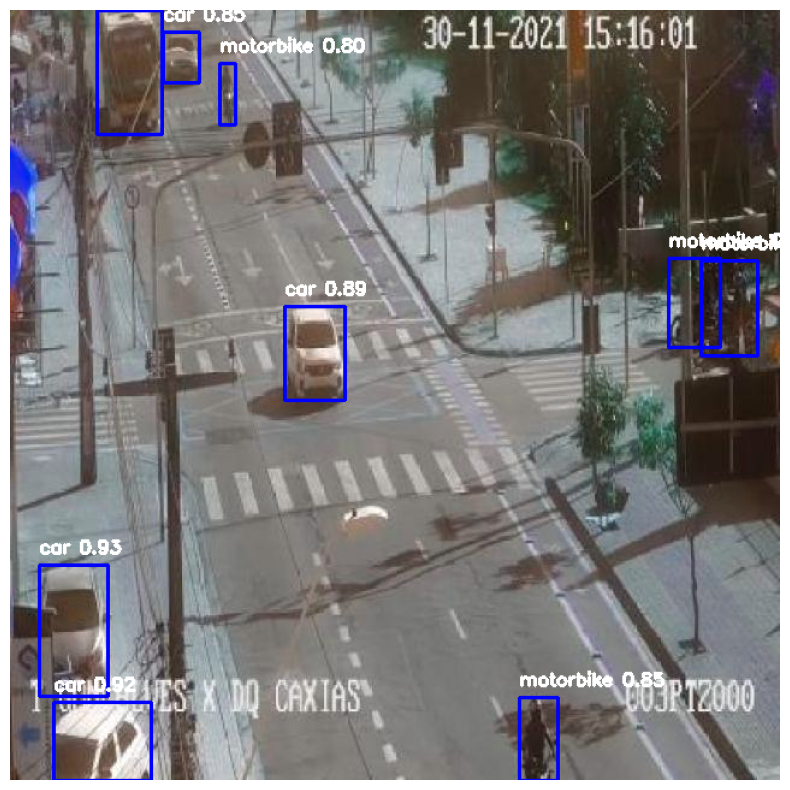

In [13]:
# results = model.val(data="coco8.yaml")
 
# # Make predictions
results = model(tpaths2)
 
# Extract the first result from the list
result = results[5]  # Get the first element of the list
 
# Load the original image using OpenCV
image = cv2.imread(tpaths2[5])
 
# Convert the color from BGR to RGB for matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
# Get bounding boxes and class names
boxes = result.boxes  # Access boxes from the result
names = result.names   # Access class names
 
for box in boxes.data:  # Use the 'data' attribute
    x1, y1, x2, y2, conf, cls = box  # Unpack the box values
    class_name = names[int(cls)]
    # Draw rectangle
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
    # Put the class name and confidence score on the image
    label = f"{class_name} {conf:.2f}"
    cv2.putText(image, label, (int(x1), int(y1 - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
 
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()

In [14]:
# # Load the pre-trained YOLOv8 model
# model = model  # Using the YOLOv8 large model

# # Vehicle classes in YOLOv8 model (ensure these match the COCO dataset classes)
# vehicle_classes = ['bicycle', 'car', 'motorcycle', 'bus', 'truck']  # Adjust if necessary

# # Define paths
# dataset_path = '/kaggle/input/traffic-detection-project'  # Change this to the path where your images are stored
# images_path = os.path.join(dataset_path, 'test', 'images')  # Change 'test' to 'train' or 'valid' accordingly

# # Prepare output CSV
# output_data = []

# # Loop through images and run YOLOv8 inference
# for image_name in tqdm(os.listdir(images_path)):
#     image_path = os.path.join(images_path, image_name)
    
#     # Load image using OpenCV
#     img = cv2.imread(image_path)
    
#     # Perform inference
#     results = model(img)
    
#     # Parse the results
#     detections = results.pandas().xyxy[0]  # Get the detected bounding boxes and classes
#     vehicle_counts = {vehicle: 0 for vehicle in vehicle_classes}
    
#     # Count each type of vehicle
#     for index, row in detections.iterrows():
#         class_name = row['name']
#         if class_name in vehicle_classes:
#             vehicle_counts[class_name] += 1
    
#     # Append counts to the output list
#     output_data.append([image_name] + list(vehicle_counts.values()))

# # Convert output data to DataFrame
# columns = ['image_name'] + vehicle_classes
# df = pd.DataFrame(output_data, columns=columns)

# # Save to CSV
# csv_output_path = 'vehicle_counts.csv'
# df.to_csv(csv_output_path, index=False)

# print(f'CSV file with vehicle counts saved to {csv_output_path}')

In [15]:
import torch
import os
import cv2
import pandas as pd
from tqdm import tqdm

# Load YOLOv5 model - pre-trained on COCO dataset
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Vehicle classes in COCO dataset
vehicle_classes = ['bicycle', 'car', 'motorcycle', 'bus', 'truck']

# Define paths
dataset_path = '/kaggle/input/traffic-detection-project'  # Change this to the path where your images are stored
images_path = os.path.join(dataset_path, 'test', 'images')  # Change 'test' to 'train' or 'valid' accordingly

# Prepare output CSV
output_data = []

# Loop through images and run YOLOv5 inference
for image_name in tqdm(os.listdir(images_path)):
    image_path = os.path.join(images_path, image_name)
    
    # Load image using OpenCV
    img = cv2.imread(image_path)
    
    # Perform inference
    results = model(img)
    
    # Parse the results
    detections = results.pandas().xyxy[0]  # Get the detected bounding boxes and classes
    vehicle_counts = {vehicle: 0 for vehicle in vehicle_classes}
    
    # Count each type of vehicle
    for index, row in detections.iterrows():
        class_name = row['name']
        if class_name in vehicle_classes:
            vehicle_counts[class_name] += 1
    
    # Append counts to the output list
    output_data.append([image_name] + list(vehicle_counts.values()))

# Convert output data to DataFrame
columns = ['image_name'] + vehicle_classes
df = pd.DataFrame(output_data, columns=columns)

# Save to CSV
csv_output_path = 'vehicle_counts.csv'
df.to_csv(csv_output_path, index=False)

print(f'CSV file with vehicle counts saved to {csv_output_path}')

/opt/conda/lib/python3.10/site-packages/torch/hub.py:295: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


WARNING ⚠️ invalid check_version(None, >=1.4.1) requested, please check values.
requirements: Ultralytics requirement ['numpy>=1.23.5'] not found, attempting AutoUpdate...


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 24.8.3 requires cubinlinker, which is not installed.
cudf 24.8.3 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 24.8.3 requires ptxcompiler, which is not installed.
cuml 24.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 24.8.3 requires cupy-cuda11x>=12.0.0, which is not installed.
ucxx 0.39.1 requires libucx>=1.15.0, which is not installed.
apache-beam 2.46.0 requires cloudpickle~=2.2.1, but you have cloudpickle 3.0.0 which is incompatible.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 2.1.2 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 16.1.0 which is incompatible.
catboost 1.2.7 requires numpy<2.0,>=1.16.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 233.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.0
    Uninstalling numpy-1.23.0:
      Successfully uninstalled numpy-1.23.0

requirements: AutoUpdate success ✅ 14.1s, installed 1 package: ['numpy>=1.23.5']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-10-22 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 123MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
100%|██████████| 279/279 [00:04<00:00, 59.87it/s]

CSV file with vehicle counts saved to vehicle_counts.csv


In [16]:
print(model)

num_layers = sum(1 for _ in model.modules())
print(f'Total number of layers: {num_layers}')

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [17]:
csv = pd.read_csv('/kaggle/working/vehicle_counts.csv')
csv.head()

,image_name,bicycle,car,motorcycle,bus,truck
0,screenshot_3576_jpg.rf.677ee49aacd9da749aeba08...,1,18,0,2,0
1,screenshot_14324_jpg.rf.e0e997784af6427e20d013...,1,9,0,2,0
2,aguanambi-2105_png_jpg.rf.913b43f78d50d1ac51dc...,0,3,0,5,5
3,image41_png_jpg.rf.0491e6f32304a84ab6c549ba311...,0,13,0,0,0
4,image93_png_jpg.rf.db0e6e038d0f47fd708e5aca86d...,0,5,0,2,1


In [18]:
cctv_cameras = ['aguanambi', 'image', 'screenshot', 'duque', 'ant_sales']

def get_cctv_group(image_name):
    for cctv in cctv_cameras:
        if image_name.startswith(cctv):
            return cctv
    return 'unknown'  # Fallback for non-matching cases

csv['cctv_group'] = csv['image_name'].apply(get_cctv_group)

# Group by the CCTV group and sum the vehicle counts
grouped_df = csv.groupby('cctv_group').sum().reset_index()

In [19]:
csv

,image_name,bicycle,car,motorcycle,bus,truck,cctv_group
0,screenshot_3576_jpg.rf.677ee49aacd9da749aeba08...,1,18,0,2,0,screenshot
1,screenshot_14324_jpg.rf.e0e997784af6427e20d013...,1,9,0,2,0,screenshot
2,aguanambi-2105_png_jpg.rf.913b43f78d50d1ac51dc...,0,3,0,5,5,aguanambi
3,image41_png_jpg.rf.0491e6f32304a84ab6c549ba311...,0,13,0,0,0,image
4,image93_png_jpg.rf.db0e6e038d0f47fd708e5aca86d...,0,5,0,2,1,image
...,...,...,...,...,...,...,...
274,screenshot_17887_jpg.rf.6487401d8009a02fee4351...,0,0,0,1,2,screenshot
275,ant_sales-10415_png_jpg.rf.ad5eb833b88c0f3e302...,1,0,0,0,1,ant_sales
276,ant_sales-11185_png_jpg.rf.b6d79b3c7bdcf7221db...,3,0,0,1,1,ant_sales
277,ant_sales-10370_png_jpg.rf.0480ed5a0843bb80f84...,1,2,0,0,1,ant_sales


In [20]:
csv[csv['cctv_group'] == 'aguanambi'].shape

(41, 7)

In [21]:
csv[csv['cctv_group'] == 'ant_sales'].shape

(67, 7)

In [22]:
csv[csv['cctv_group'] == 'duque'].shape

(45, 7)

In [23]:
csv[csv['cctv_group'] == 'image'].shape

(44, 7)

In [24]:
csv[csv['cctv_group'] == 'screenshot'].shape

(82, 7)

In [25]:
grouped_df

,cctv_group,image_name,bicycle,car,motorcycle,bus,truck
0,aguanambi,aguanambi-2105_png_jpg.rf.913b43f78d50d1ac51dc...,1,88,2,60,63
1,ant_sales,ant_sales-10965_png_jpg.rf.bc89fbd399c8f3239dc...,87,17,1,9,20
2,duque,duque_de_caxias-1605_png_jpg.rf.9ff453450e8486...,7,62,0,12,11
3,image,image41_png_jpg.rf.0491e6f32304a84ab6c549ba311...,6,191,2,46,11
4,screenshot,screenshot_3576_jpg.rf.677ee49aacd9da749aeba08...,11,525,2,77,69


In [26]:
grouped_df['cctv_group'].unique()

array(['aguanambi', 'ant_sales', 'duque', 'image', 'screenshot'], dtype=object)

In [27]:
import numpy as np

# Add a timestamp column (you can modify the start date and frequency as needed)
timestamps = pd.date_range(start='2024-06-01', periods=40, freq='T')

# Group the data by cctv_group and randomly sample 40 rows from each group
grouped_dfs = {}
for group_name in csv['cctv_group'].unique():
    group_df = csv[csv['cctv_group'] == group_name].sample(n=40, random_state=42, replace=False).reset_index(drop=True)
    group_df['timestamp'] = timestamps  # Assign the same timestamps to each group
    grouped_dfs[group_name] = group_df

for group_name, group_df in grouped_dfs.items():
    output_path = f'{group_name}_dataset.csv'  # Save to a CSV named after the cctv_group
    group_df.to_csv(output_path, index=False)
    print(f'Saved {group_name} dataset to {output_path}')

Saved screenshot dataset to screenshot_dataset.csv
Saved aguanambi dataset to aguanambi_dataset.csv
Saved image dataset to image_dataset.csv
Saved duque dataset to duque_dataset.csv
Saved ant_sales dataset to ant_sales_dataset.csv


In [28]:
aguanambi_df = pd.read_csv('/kaggle/working/aguanambi_dataset.csv')
ant_sales_df = pd.read_csv('/kaggle/working/ant_sales_dataset.csv')
duque_df = pd.read_csv('/kaggle/working/duque_dataset.csv')
screenshot_df = pd.read_csv('/kaggle/working/screenshot_dataset.csv')
image_df = pd.read_csv('/kaggle/working/image_dataset.csv')

In [29]:
aguanambi_df.head()

,image_name,bicycle,car,motorcycle,bus,truck,cctv_group,timestamp
0,aguanambi-1095_png_jpg.rf.4d9f0370f1c09fb2a1d1...,0,3,0,3,3,aguanambi,2024-06-01 00:00:00
1,aguanambi-4540_png_jpg.rf.0a1d526d5508f4c7fe81...,0,0,0,1,0,aguanambi,2024-06-01 00:01:00
2,aguanambi-3840_png_jpg.rf.e81264f835d8c15a3d57...,0,1,0,0,2,aguanambi,2024-06-01 00:02:00
3,aguanambi-5280_png_jpg.rf.ef5cf76f24a11e3776a7...,0,0,0,3,1,aguanambi,2024-06-01 00:03:00
4,aguanambi-5425_png_jpg.rf.14d5886ee52334426d7f...,0,2,0,2,2,aguanambi,2024-06-01 00:04:00


In [30]:
ant_sales_df.head()

,image_name,bicycle,car,motorcycle,bus,truck,cctv_group,timestamp
0,ant_sales-10710_png_jpg.rf.acb2b8b2da38205c313...,2,0,0,0,0,ant_sales,2024-06-01 00:00:00
1,ant_sales-12140_png_jpg.rf.2e4a2424acb5752b124...,3,0,0,0,1,ant_sales,2024-06-01 00:01:00
2,ant_sales-11410_png_jpg.rf.9b840a5494e2a57a135...,1,0,0,0,0,ant_sales,2024-06-01 00:02:00
3,ant_sales-1200_png_jpg.rf.51f0c083d921102dbbf4...,0,1,0,0,0,ant_sales,2024-06-01 00:03:00
4,ant_sales-1085_png_jpg.rf.2140c135f44f45d103ff...,0,0,0,0,0,ant_sales,2024-06-01 00:04:00


In [31]:
duque_df.head()

,image_name,bicycle,car,motorcycle,bus,truck,cctv_group,timestamp
0,duque_de_caxias-1410_png_jpg.rf.3c0bc3cdc8804d...,0,2,0,0,0,duque,2024-06-01 00:00:00
1,duque_de_caxias-15_png_jpg.rf.f17f4bfd0b95c95e...,0,0,0,0,0,duque,2024-06-01 00:01:00
2,duque_de_caxias-2760_png_jpg.rf.0a91eb87ee2021...,0,0,0,1,0,duque,2024-06-01 00:02:00
3,duque_de_caxias-2040_png_jpg.rf.f4897be05a717b...,0,1,0,0,0,duque,2024-06-01 00:03:00
4,duque_de_caxias-2615_png_jpg.rf.849d17c3fd8df1...,1,2,0,1,1,duque,2024-06-01 00:04:00


In [32]:
screenshot_df.head()

,image_name,bicycle,car,motorcycle,bus,truck,cctv_group,timestamp
0,screenshot_5813_jpg.rf.e13418cf6416d2d2dce66fd...,0,6,0,1,1,screenshot,2024-06-01 00:00:00
1,screenshot_3576_jpg.rf.677ee49aacd9da749aeba08...,1,18,0,2,0,screenshot,2024-06-01 00:01:00
2,screenshot_10136_jpg.rf.95227b3b5cecb4bfda99f0...,1,1,0,0,1,screenshot,2024-06-01 00:02:00
3,screenshot_16709_jpg.rf.e5f7f17be1b8324a08bfd8...,0,11,1,0,3,screenshot,2024-06-01 00:03:00
4,screenshot_8794_jpg.rf.c0ca9bf8cda99d02bb34f33...,0,1,0,0,0,screenshot,2024-06-01 00:04:00


In [33]:
image_df.head()

,image_name,bicycle,car,motorcycle,bus,truck,cctv_group,timestamp
0,image58_png_jpg.rf.80285cd4d710d83c7d5c2e6d137...,0,6,0,1,0,image,2024-06-01 00:00:00
1,image62_png_jpg.rf.2b09194ea60415a31dd2323079b...,0,2,0,3,0,image,2024-06-01 00:01:00
2,image73_png_jpg.rf.542459ff113f00fcc89c0e0b150...,1,2,0,0,1,image,2024-06-01 00:02:00
3,image50_png_jpg.rf.a8cef7c79d333922adadc38fd7b...,0,4,0,1,0,image,2024-06-01 00:03:00
4,image78_png_jpg.rf.2ad49f5044234f42068aca3f6d0...,0,8,0,2,1,image,2024-06-01 00:04:00


In [34]:
df = pd.concat([aguanambi_df, ant_sales_df, duque_df, screenshot_df, image_df], ignore_index=True)
df.to_csv('processed_traffic_data.csv')

In [35]:
import pandas as pd
import plotly.express as px

In [36]:

df['total_vehicles'] = df[['bicycle', 'car', 'motorcycle', 'bus', 'truck']].sum(axis=1)

# Step 2: Group data by cctv_group and timestamp to aggregate vehicle counts
df_grouped = df.groupby(['cctv_group', 'timestamp']).agg(total_vehicles=('total_vehicles', 'sum')).reset_index()

# Step 3: Defining congestion threshold for analysis (e.g., 10 vehicles indicate congestion)
congestion_threshold = 10
df_grouped['congestion'] = df_grouped['total_vehicles'] > congestion_threshold

# Advanced analytics: Peak hour detection by summarizing vehicle count over time
peak_hours = df_grouped[df_grouped['total_vehicles'] > congestion_threshold].groupby('timestamp').agg(
    total_traffic=('total_vehicles', 'sum')).reset_index()

# Plot 1: Traffic pattern over time to suggest the least congested hours
line_fig = px.line(df_grouped, x='timestamp', y='total_vehicles', color='cctv_group', 
                   title='Traffic Flow Over Time at Different Junctions')

# Plot 2: Heatmap for visualizing traffic intensity at each junction over time
heatmap_fig = px.density_heatmap(df_grouped, x='timestamp', y='cctv_group', z='total_vehicles', 
                                 title='Traffic Intensity Heatmap')

# Plot 3: Predicting peak congestion periods with bar chart visualization
bar_fig = px.bar(peak_hours, x='timestamp', y='total_traffic', 
                 title='Peak Congestion Hours Across All Junctions')

(line_fig.show(), heatmap_fig.show(), bar_fig.show())

(None, None, None)

In [37]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import IsolationForest
import plotly.express as px


# Step 1: Add a total vehicle count column
df['total_vehicles'] = df[['bicycle', 'car', 'motorcycle', 'bus', 'truck']].sum(axis=1)

# Group data by timestamp for prediction
df_grouped = df.groupby('timestamp').agg(total_vehicles=('total_vehicles', 'sum')).reset_index()

# Step 1: Predictive Traffic Analysis using ARIMA (forecast traffic)
model = ARIMA(df_grouped['total_vehicles'], order=(5, 1, 0))  # ARIMA(5,1,0) model
model_fit = model.fit()

# Forecast for the next 10 time periods
forecast = model_fit.forecast(steps=10)

# Adding the forecast to the DataFrame for visualization
forecast_df = pd.DataFrame({
    'timestamp': pd.date_range(start=df_grouped['timestamp'].max(), periods=10, freq='min'),
    'total_vehicles': forecast
})

# Step 2: Anomaly Detection Using Z-Score
df_grouped['z_score'] = (df_grouped['total_vehicles'] - df_grouped['total_vehicles'].mean()) / df_grouped['total_vehicles'].std()
df_grouped['anomaly'] = np.where(np.abs(df_grouped['z_score']) > 2, True, False)  # Anomaly if Z-score > 2

# Step 3: Dynamic Route Recommendation
# Recommending least congested times by suggesting the timestamps with the lowest predicted traffic
df_recommendation = forecast_df[forecast_df['total_vehicles'] == forecast_df['total_vehicles'].min()]

# Visualization
# Plot 1: Traffic Prediction (ARIMA forecast)
forecast_fig = px.line(pd.concat([df_grouped, forecast_df]), x='timestamp', y='total_vehicles', 
                       title='Predicted Traffic Over Time (ARIMA)', markers=True)

# Plot 2: Anomaly Detection (Highlight anomalies)
anomaly_fig = px.scatter(df_grouped, x='timestamp', y='total_vehicles', color='anomaly', 
                         title='Anomaly Detection in Traffic Flow')

# Display the recommendation
print("Recommended time to travel based on predicted traffic:")
print(df_recommendation)

# Show plots
(forecast_fig.show(), anomaly_fig.show())

Recommended time to travel based on predicted traffic:
             timestamp  total_vehicles
43 2024-06-01 00:42:00       17.751267


(None, None)

In [38]:
from prophet import Prophet

In [39]:
from plotly.subplots import make_subplots

In [40]:
pip install dash

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 59.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [41]:
from dash import Dash, dcc, html, Input, Output

In [42]:
df['cctv_group'].unique()

array(['aguanambi', 'ant_sales', 'duque', 'screenshot', 'image'], dtype=object)

In [43]:
import plotly.graph_objects as go


# Add total vehicle count per row
df['total_vehicles'] = df[['bicycle', 'car', 'motorcycle', 'bus', 'truck']].sum(axis=1)

# Step 1: Prepare data for Prophet by junction
def prepare_data_for_prophet(df, junction):
    df_junction = df[df['cctv_group'] == junction][['timestamp', 'total_vehicles']].copy()
    df_junction.columns = ['ds', 'y']  # Prophet requires 'ds' (timestamp) and 'y' (value to predict)
    return df_junction

# Dictionary to store Prophet models for each junction
models = {}
junctions = df['cctv_group'].unique()

# Train Prophet model for each junction
for junction in junctions:
    df_junction = prepare_data_for_prophet(df, junction)
    model = Prophet(daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=False)
    model.add_seasonality(name='min', period=2, fourier_order=10)
    model.fit(df_junction)
    models[junction] = model

# Step 2: Create interactive app using Dash
app = Dash(__name__)

app.layout = html.Div([
    html.H1("Traffic Forecast and Vehicle Count at Different Junctions"),
    
    # Dropdown to select junction
    dcc.Dropdown(
        id='junction-dropdown',
        options=[{'label': junction, 'value': junction} for junction in junctions],
        value=junctions[0],  # Default value
        style={'width': '50%'}
    ),
    
    # Slider to select number of future data points (timestamps)
    dcc.Slider(
        id='points-slider',
        min=5,
        max=50,
        step=5,
        value=30,  # Default points
        marks={i: f'{i} points' for i in range(5, 50, 10)},
        tooltip={'always_visible': True}
    ),
    
    # DatePicker for selecting timestamp
    html.Label("Select Timestamp:"),
    dcc.DatePickerSingle(
        id='timestamp-picker',
        min_date_allowed=df['timestamp'].min(),
        max_date_allowed=df['timestamp'].max(),
        date=df['timestamp'].max()  # Default to the most recent timestamp
    ),
    
    # Placeholder for the graph - Forecast graph
    dcc.Graph(id='forecast-graph'),
    
    # Placeholder for the graph - Vehicle breakdown graph
    dcc.Graph(id='vehicle-type-graph'),
    
    # Display predicted vehicles at selected timestamp
    html.Div(id='vehicle-output', style={'font-size': '20px', 'margin-top': '20px'})
])

# Step 3: Callback for dynamic graph and vehicle output
@app.callback(
    [Output('forecast-graph', 'figure'),
     Output('vehicle-type-graph', 'figure'),
     Output('vehicle-output', 'children')],
    [Input('junction-dropdown', 'value'),
     Input('points-slider', 'value'),
     Input('timestamp-picker', 'date')]
)
def update_forecast(selected_junction, num_points, selected_timestamp):
    # Generate forecast for selected junction and number of future points
    model = models[selected_junction]
    future = model.make_future_dataframe(periods=num_points, freq='min')  # Minute-level forecast
    forecast = model.predict(future)

    # Step 4: Clip negative values to 0
    forecast['yhat'] = forecast['yhat'].clip(lower=0)
    forecast['yhat_upper'] = forecast['yhat_upper'].clip(lower=0)
    forecast['yhat_lower'] = forecast['yhat_lower'].clip(lower=0)
    
    # Curvy plot with forecast and intervals
    fig_forecast = go.Figure()
    fig_forecast.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Predicted Vehicles'))
    fig_forecast.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], mode='lines', fill='tonexty', name='Upper Bound', line=dict(dash='dash')))
    fig_forecast.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], mode='lines', fill='tonexty', name='Lower Bound', line=dict(dash='dash')))
    fig_forecast.update_layout(title=f"Traffic Forecast for {selected_junction}", xaxis_title="Timestamp", yaxis_title="Predicted Vehicles")

    # Step 5: Get the forecast for the selected timestamp
    selected_time = pd.to_datetime(selected_timestamp)
    forecast_at_time = forecast[forecast['ds'] == selected_time]
    
    if not forecast_at_time.empty:
        predicted_vehicles = forecast_at_time['yhat'].values[0]
        output_text = f"Predicted number of vehicles at {selected_time}: {np.round(predicted_vehicles)}"
    else:
        output_text = f"No prediction available for the selected timestamp."

    # Step 6: Plot the number of bikes, cars, buses, and trucks
    df_junction = df[df['cctv_group'] == selected_junction]
    fig_vehicle_types = go.Figure()
    fig_vehicle_types.add_trace(go.Scatter(x=df_junction['timestamp'], y=df_junction['bicycle'], mode='lines+markers', name='Bicycles'))
    fig_vehicle_types.add_trace(go.Scatter(x=df_junction['timestamp'], y=df_junction['car'], mode='lines+markers', name='Cars'))
    fig_vehicle_types.add_trace(go.Scatter(x=df_junction['timestamp'], y=df_junction['bus'], mode='lines+markers', name='Buses'))
    fig_vehicle_types.add_trace(go.Scatter(x=df_junction['timestamp'], y=df_junction['truck'], mode='lines+markers', name='Trucks'))
    fig_vehicle_types.update_layout(title=f"Vehicle Types at {selected_junction}", xaxis_title="Timestamp", yaxis_title="Number of Vehicles")

    return fig_forecast, fig_vehicle_types, output_text

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


09:30:50 - cmdstanpy - INFO - Chain [1] start processing
09:30:50 - cmdstanpy - INFO - Chain [1] done processing
09:30:50 - cmdstanpy - INFO - Chain [1] start processing
09:30:50 - cmdstanpy - INFO - Chain [1] done processing
09:30:51 - cmdstanpy - INFO - Chain [1] start processing
09:30:51 - cmdstanpy - INFO - Chain [1] done processing
09:30:51 - cmdstanpy - INFO - Chain [1] start processing
09:30:51 - cmdstanpy - INFO - Chain [1] done processing
09:30:51 - cmdstanpy - INFO - Chain [1] start processing
09:30:51 - cmdstanpy - INFO - Chain [1] done processing
